In [22]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [23]:
data = pd.read_csv('../data/4digit_custom_dataset.csv')

In [24]:
data

,password,strength
0,1111,0
1,1112,0
2,1113,0
3,1114,0
4,1115,0
...,...,...
4161,5495,0
4162,6594,0
4163,7693,0
4164,8792,0


In [25]:
data.strength.value_counts()

strength
1    3498
0     668
Name: count, dtype: int64

In [26]:
data = data.sample(frac=1).reset_index(drop=True)
X = data['password'].astype(str).tolist()
y = data['strength'].astype(int).tolist()


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
def char_tokenize(inputs):
    return list(inputs)
vectorizer = TfidfVectorizer(tokenizer=char_tokenize, lowercase=False)
X_vectorized = vectorizer.fit_transform(X)

In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_vectorized,y,test_size=0.3,random_state=42)

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [32]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [33]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8504
              precision    recall  f1-score   support

           0       0.91      0.10      0.18       206
           1       0.85      1.00      0.92      1044

    accuracy                           0.85      1250
   macro avg       0.88      0.55      0.55      1250
weighted avg       0.86      0.85      0.80      1250



In [34]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.8528
              precision    recall  f1-score   support

           0       0.57      0.44      0.50       206
           1       0.89      0.93      0.91      1044

    accuracy                           0.85      1250
   macro avg       0.73      0.69      0.71      1250
weighted avg       0.84      0.85      0.85      1250



In [35]:
import joblib
joblib.dump(dt_model, 'DecisionTree_Model.joblib')

['DecisionTree_Model.joblib']

In [ ]:
joblib.dump(vectorizer, 'vectorizer.joblib')

['vectorizer.joblib']

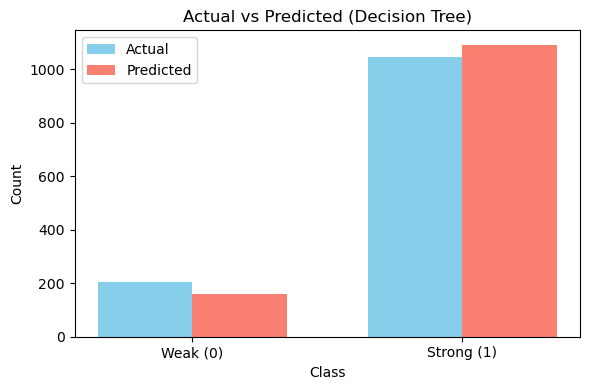

In [39]:
import numpy as np
import matplotlib.pyplot as plt
actual_counts = np.bincount(y_test)
predicted_counts = np.bincount(y_pred_dt)

bar_width = 0.35
labels = ['Weak (0)', 'Strong (1)']
x = np.arange(len(labels))

plt.figure(figsize=(6, 4))
plt.bar(x - bar_width/2, actual_counts, bar_width, label='Actual', color='skyblue')
plt.bar(x + bar_width/2, predicted_counts, bar_width, label='Predicted', color='salmon')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Actual vs Predicted (Decision Tree)')
plt.xticks(x, labels)
plt.legend()
plt.tight_layout()
plt.show()
